In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [17]:
dados = pd.read_csv('dadosacoes.csv')

In [18]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


C:\Users\dsadm\AppData\Local\Temp\ipykernel_29336\3444756440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


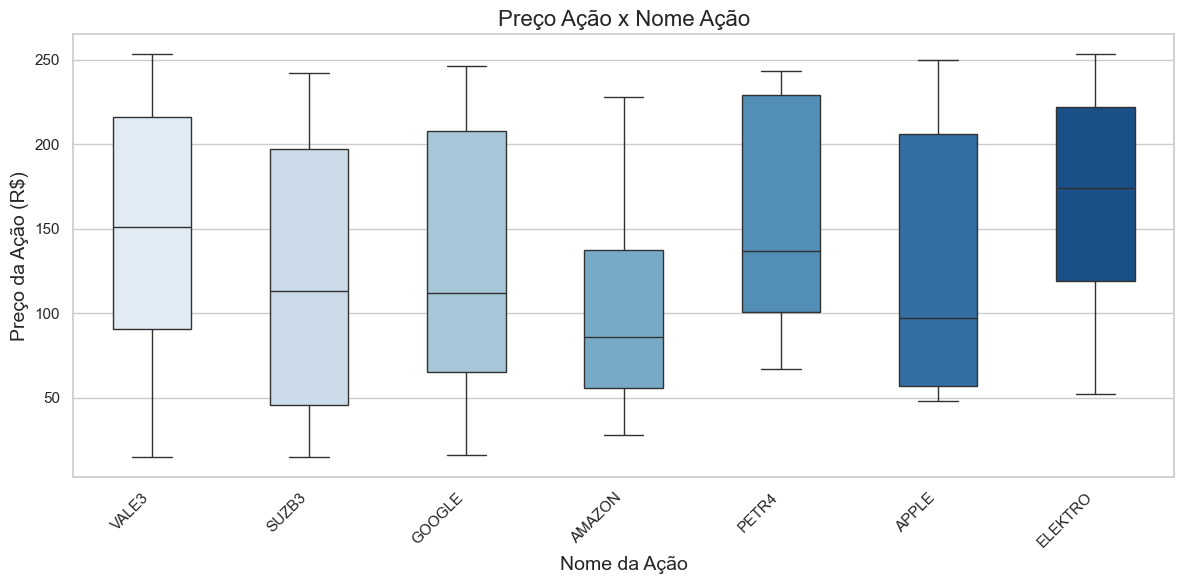

In [ ]:
plt.figure(figsize=(12, 6))  
sns.set(style="whitegrid")  


boxplot = sns.boxplot(
    data=dados,  
    x='nome ação', 
    y='preço ação R$',  
    palette="Blues",  
    width=0.5  
)

plt.title('Preço Ação x Nome Ação', fontsize=16) 
plt.xlabel('Nome da Ação', fontsize=14)  
plt.ylabel('Preço da Ação (R$)', fontsize=14)  
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das ações para melhor visualização


plt.tight_layout()  # justa o layout para evitar sobreposição
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_29336\4137907677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


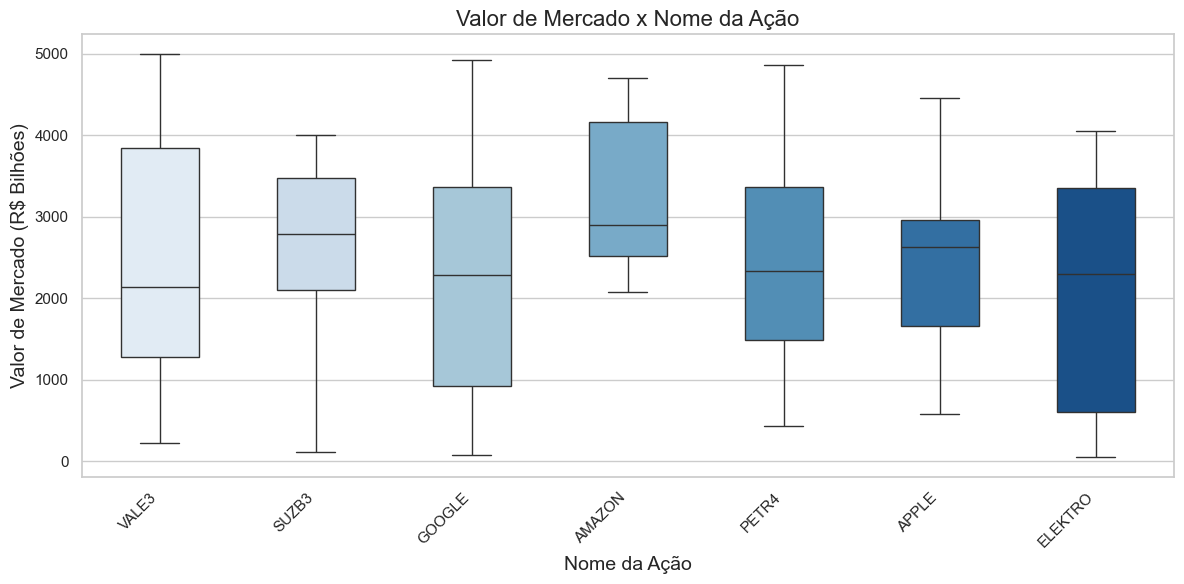

In [ ]:
# criar o boxplot com seaborn
plt.figure(figsize=(12, 6)) 
sns.set(style="whitegrid")  

boxplot = sns.boxplot(
    data=dados,  
    x='nome ação',  
    y='valor de mercado R$ -(Bilhões)',  
    palette="Blues",  # paleta de cores para o boxplot
    width=0.5  # largura das caixas
)


plt.title('Valor de Mercado x Nome da Ação', fontsize=16)  
plt.xlabel('Nome da Ação', fontsize=14)  
plt.ylabel('Valor de Mercado (R$ Bilhões)', fontsize=14)  
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  # ajusta para evitar sobreposição
plt.show()

In [21]:
print("Informações gerais do DataFrame:\n")
dados.info()

Informações gerais do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [33]:
print("Estatísticas descritivas:")
dados.describe()

Estatísticas descritivas:


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [23]:
print(dados.isnull().sum())

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64


In [24]:
dados_encoded = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)
print(dados_encoded.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  
0             True  
1            F

In [25]:
dados_relevantes = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

In [26]:
# selecionando apenas as colunas numericas do dataframe
col_n = dados.select_dtypes(include=['number'])

In [ ]:
# realizando o agrupamento com Kmeans
dados_n = pd.get_dummies(dados, columns=['nome ação'],drop_first= True)

In [28]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(dados_relevantes)
dados_n['Cluster'] = kmeans.labels_

In [45]:
print(dados_n.columns)


Index(['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)',
       'nome ação_APPLE', 'nome ação_ELEKTRO', 'nome ação_GOOGLE',
       'nome ação_PETR4', 'nome ação_SUZB3', 'nome ação_VALE3', 'Cluster',
       'Cluster_5', 'Cluster_8'],
      dtype='object')


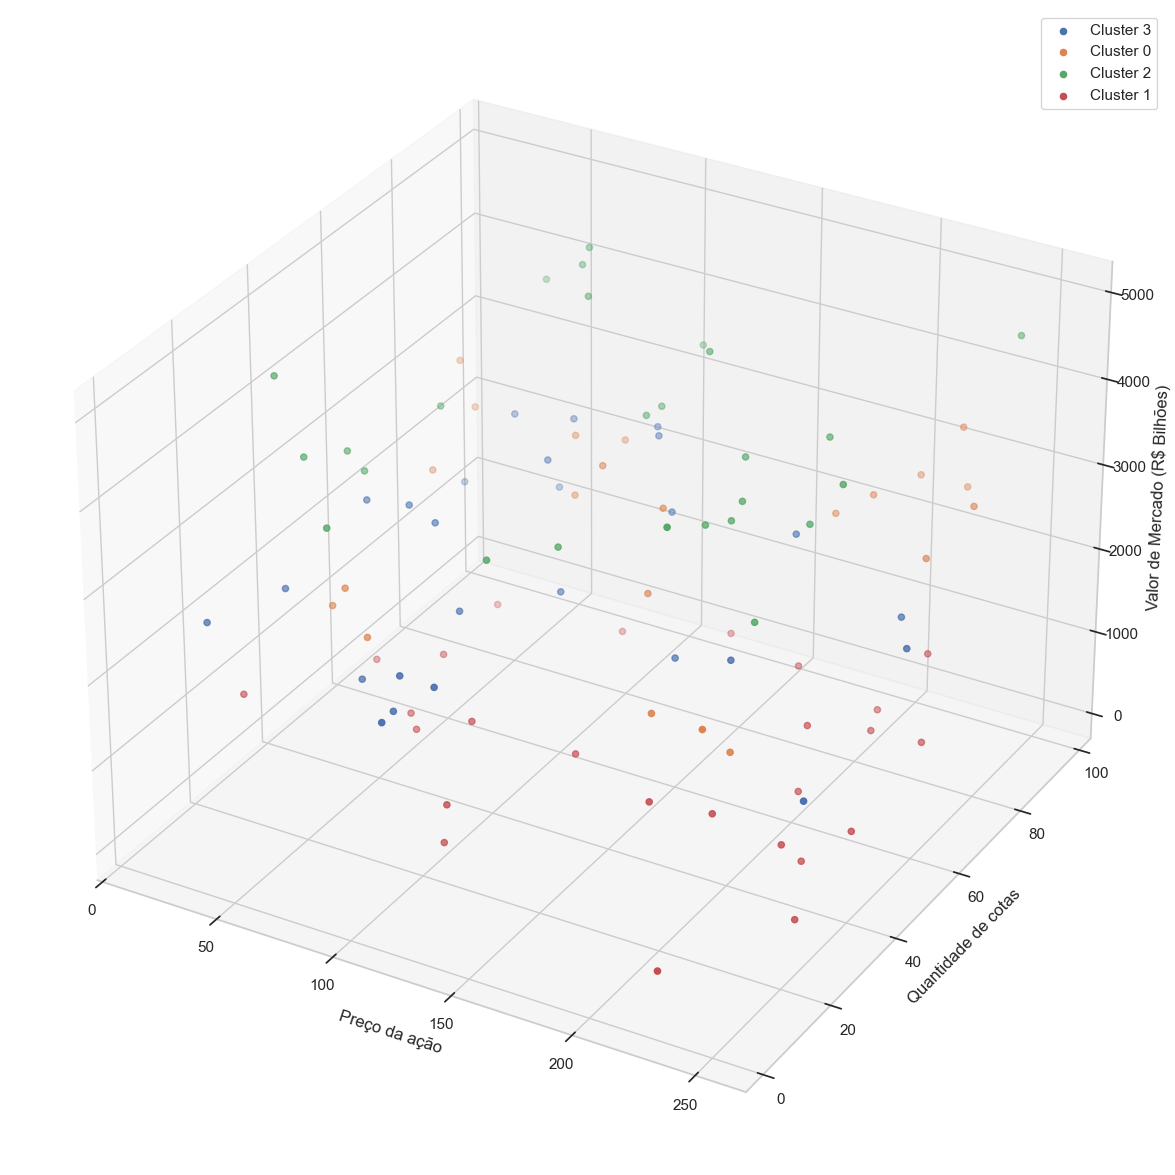

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           153.136364   54.545455                     3020.454545   
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.227273   
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  Cluster_5  \
Cluster                                                                 
0               0.090909         0.181818 

In [ ]:
# visualizando os grupos no gráfico 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')


for cluster in dados_n['Cluster'].unique():
    cluster_data = dados_n[dados_n['Cluster'] == cluster]
    
    # Corrigir a passagem das colunas para o gráfico 3D
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'], 
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}')  
    

ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado (R$ Bilhões)')


plt.legend()
plt.show()

# calculo da média para cada cluster
cluster_means = dados_n.groupby('Cluster').mean()
print(cluster_means)

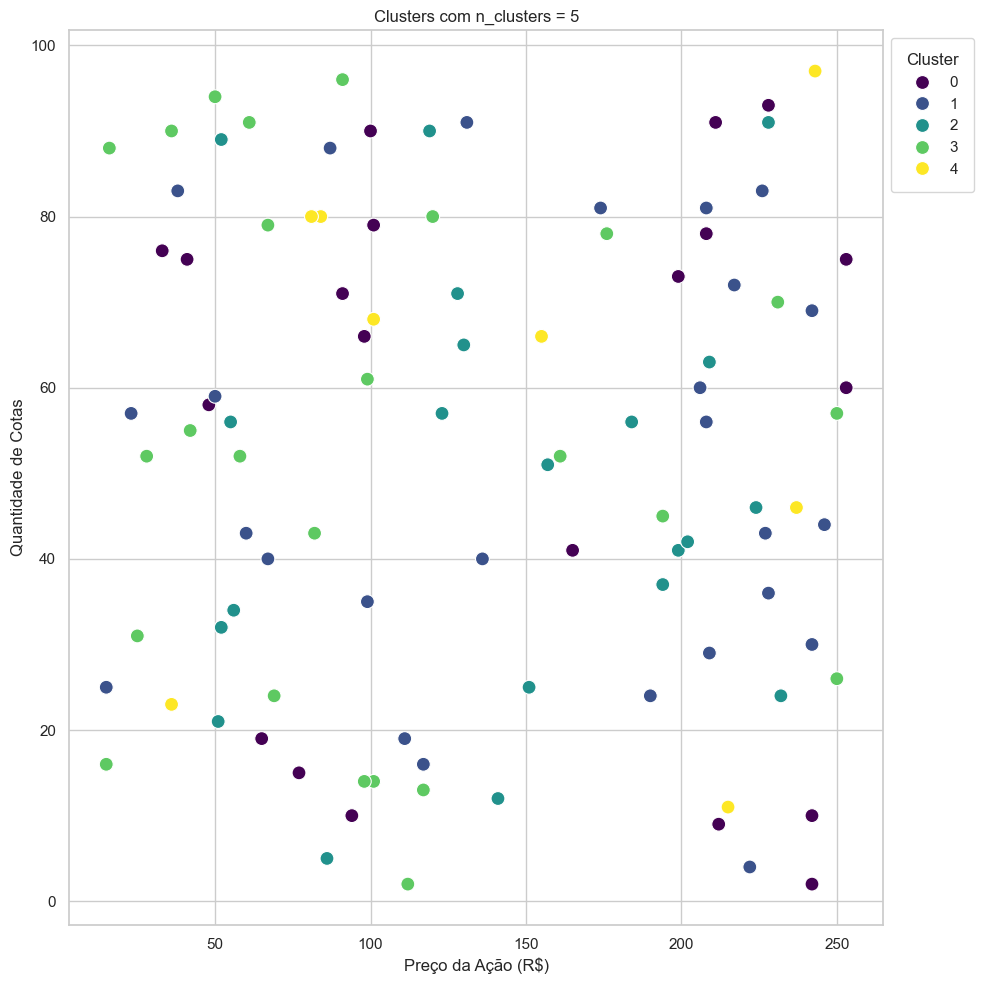

In [ ]:
# Rodando o KMeans com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
dados_n['Cluster_5'] = kmeans_5.fit_predict(dados_relevantes)


fig = plt.figure(figsize=(10, 10))

# plotando o gráfico de dispersão
sns.scatterplot(x=dados_relevantes['preço ação R$'], 
                y=dados_relevantes['qtde cotas'], 
                hue=dados_n['Cluster_5'], palette='viridis', s=100)

plt.title("Clusters com n_clusters = 5")
plt.xlabel("Preço da Ação (R$)")
plt.ylabel("Quantidade de Cotas")

# ajustando a legenda para ficar fora do grafico
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), borderpad=1)

plt.tight_layout()
plt.show()



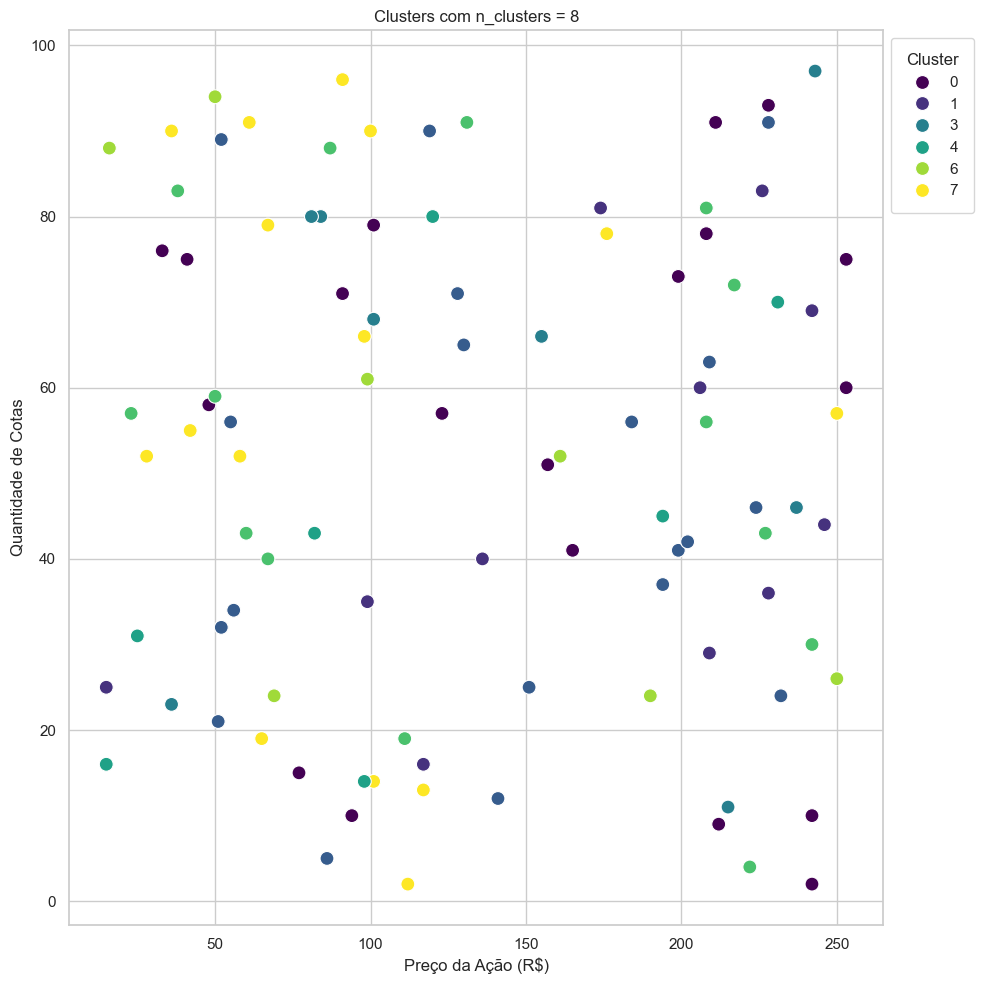

In [ ]:
# Rodando o KMeans com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=0)
dados_n['Cluster_8'] = kmeans_8.fit_predict(dados_relevantes)

fig = plt.figure(figsize=(10, 10))

sns.scatterplot(x=dados_relevantes['preço ação R$'], 
                y=dados_relevantes['qtde cotas'], 
                hue=dados_n['Cluster_8'], palette='viridis', s=100)

plt.title("Clusters com n_clusters = 8")
plt.xlabel("Preço da Ação (R$)")
plt.ylabel("Quantidade de Cotas")

plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), borderpad=1)

plt.tight_layout()
plt.show()


GRÁFICO DO COTOVELO

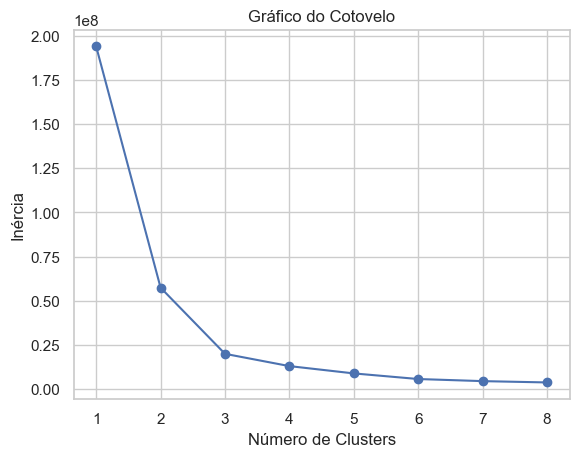

In [ ]:
inertia = []
for n in range(1, 9): 
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(dados_relevantes)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 9), inertia, marker='o')
plt.title("Gráfico do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

GRÁFICO DA SILHUETA

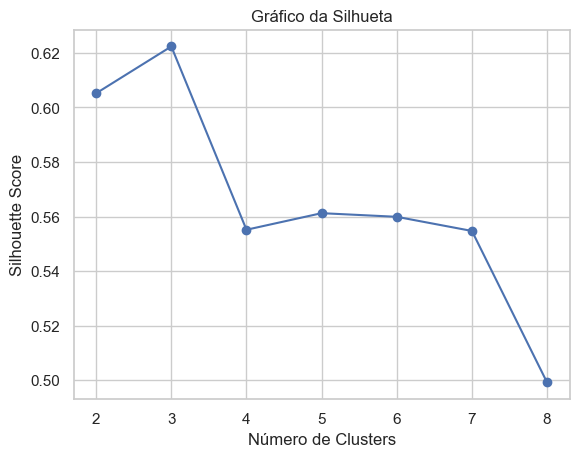

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 9):  
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(dados_relevantes)
    score = silhouette_score(dados_relevantes, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title("Gráfico da Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
print(dados_n.columns)

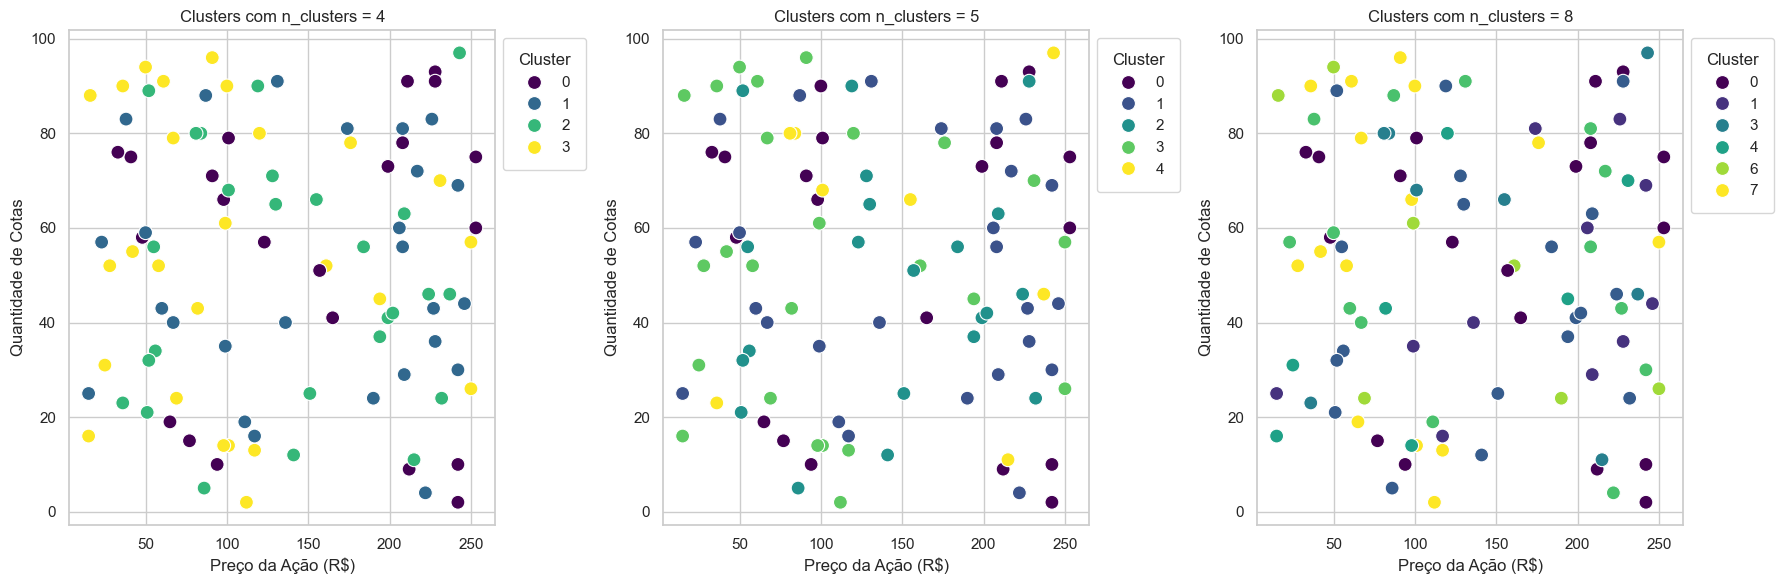

In [ ]:
# rodando com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
dados_n['Cluster'] = kmeans_4.fit_predict(dados_relevantes)

# rodando com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
dados_n['Cluster_5'] = kmeans_5.fit_predict(dados_relevantes)

# rodando com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=0)
dados_n['Cluster_8'] = kmeans_8.fit_predict(dados_relevantes)

# criando os subgráficos 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# gráfico 1 n_clusters=4
sns.scatterplot(x=dados_relevantes['preço ação R$'], 
                y=dados_relevantes['qtde cotas'], 
                hue=dados_n['Cluster'], palette='viridis', s=100, ax=axes[0])
axes[0].set_title("Clusters com n_clusters = 4")
axes[0].set_xlabel("Preço da Ação (R$)")
axes[0].set_ylabel("Quantidade de Cotas")
axes[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), borderpad=1)

# gráfico 2 n_clusters=5
sns.scatterplot(x=dados_relevantes['preço ação R$'], 
                y=dados_relevantes['qtde cotas'], 
                hue=dados_n['Cluster_5'], palette='viridis', s=100, ax=axes[1])
axes[1].set_title("Clusters com n_clusters = 5")
axes[1].set_xlabel("Preço da Ação (R$)")
axes[1].set_ylabel("Quantidade de Cotas")
axes[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), borderpad=1)

# gráfico 3 n_clusters=8
sns.scatterplot(x=dados_relevantes['preço ação R$'], 
                y=dados_relevantes['qtde cotas'], 
                hue=dados_n['Cluster_8'], palette='viridis', s=100, ax=axes[2])
axes[2].set_title("Clusters com n_clusters = 8")
axes[2].set_xlabel("Preço da Ação (R$)")
axes[2].set_ylabel("Quantidade de Cotas")
axes[2].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), borderpad=1)


plt.tight_layout()
plt.show()


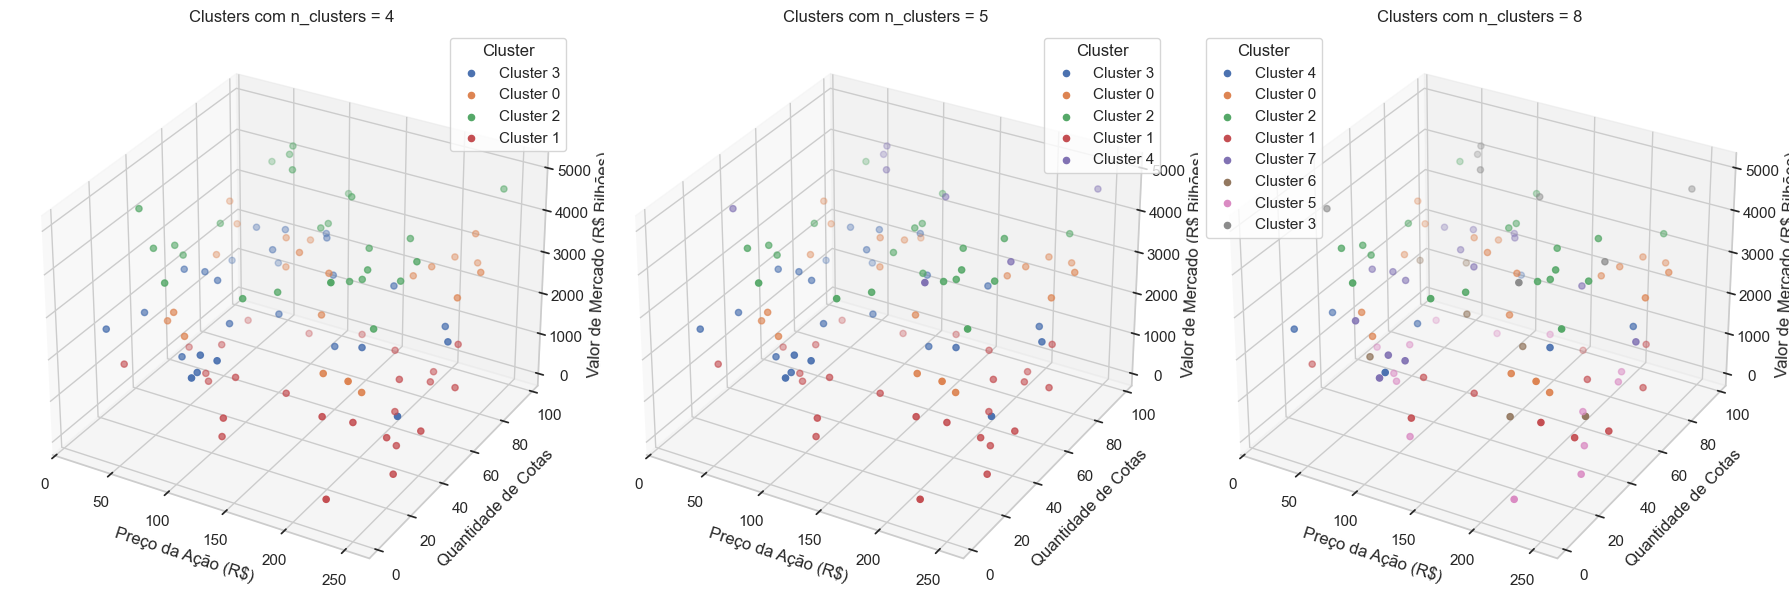

In [ ]:
# rodando com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
dados_n['Cluster'] = kmeans_4.fit_predict(dados_relevantes)

# rodando com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
dados_n['Cluster_5'] = kmeans_5.fit_predict(dados_relevantes)

# rodando com 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=0)
dados_n['Cluster_8'] = kmeans_8.fit_predict(dados_relevantes)

# criando a figura com 3 subgraficos
fig = plt.figure(figsize=(18, 6))

# subplot 1 para 4 clusters
ax1 = fig.add_subplot(131, projection='3d')
for cluster in dados_n['Cluster'].unique():
    cluster_data = dados_n[dados_n['Cluster'] == cluster]
    ax1.scatter(cluster_data['preço ação R$'], 
                cluster_data['qtde cotas'], 
                cluster_data['valor de mercado R$ -(Bilhões)'], 
                label=f'Cluster {cluster}')
ax1.set_title("Clusters com n_clusters = 4")
ax1.set_xlabel('Preço da Ação (R$)')
ax1.set_ylabel('Quantidade de Cotas')
ax1.set_zlabel('Valor de Mercado (R$ Bilhões)')
ax1.legend(title="Cluster")

# Subplot 2 para 5 clusters
ax2 = fig.add_subplot(132, projection='3d')
for cluster in dados_n['Cluster_5'].unique():
    cluster_data = dados_n[dados_n['Cluster_5'] == cluster]
    ax2.scatter(cluster_data['preço ação R$'], 
                cluster_data['qtde cotas'], 
                cluster_data['valor de mercado R$ -(Bilhões)'], 
                label=f'Cluster {cluster}')
ax2.set_title("Clusters com n_clusters = 5")
ax2.set_xlabel('Preço da Ação (R$)')
ax2.set_ylabel('Quantidade de Cotas')
ax2.set_zlabel('Valor de Mercado (R$ Bilhões)')
ax2.legend(title="Cluster")

# Subplot 3 para 8 clusters
ax3 = fig.add_subplot(133, projection='3d')
for cluster in dados_n['Cluster_8'].unique():
    cluster_data = dados_n[dados_n['Cluster_8'] == cluster]
    ax3.scatter(cluster_data['preço ação R$'], 
                cluster_data['qtde cotas'], 
                cluster_data['valor de mercado R$ -(Bilhões)'], 
                label=f'Cluster {cluster}')
ax3.set_title("Clusters com n_clusters = 8")
ax3.set_xlabel('Preço da Ação (R$)')
ax3.set_ylabel('Quantidade de Cotas')
ax3.set_zlabel('Valor de Mercado (R$ Bilhões)')
ax3.legend(title="Cluster")


plt.tight_layout()
plt.show()


5. O aprendizado não supervisionado é útil quando não temos rótulos ou dados rotulados para treinar um modelo, como no caso do agrupamento (clustering). Ele permite descobrir padrões escondidos nos dados e identificar grupos sem precisar de informações pré-definidas. Isso é vantajoso quando queremos explorar os dados ou quando não temos dados suficientes para treinar um modelo supervisionado.